# Análise Exploratória - Projeto 3

___
<div id="indice">

## Índice

- [Bibliotecas utilizadas](#biblio)
- [Importação da base de dados](#base-dados)
1. [Escolaridade e Rendimento](#esc-bruto)
2. [Distribuição Salarial por Faixa de Rendimento](#salario-faixa)
3. [Análise por Sexo e Cor/Raça](#sexo-cor)
4. [Análise por Idade](#idade)
5. [Distribuição de Ocupação](ocupa)

___
<div id="biblio"></div>

## Importação de bibliotecas utilizadas

In [1]:
#importações
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

___
<div id="base-dados"></div>

## Importação da base de dados e criação de variáveis:

[Índice](#indice)

In [3]:
dados = pd.read_csv('pnad23_filtrado.csv')


In [ ]:
dados.head(5)

,Estado,Sexo,Idade,Cor_ou_Raça,Escolaridade,Ocupação,Faixa_de_rendimento,Rendimento_Bruto
0,Rondônia,Homem,30,Parda,Regular do ensino médio ou do 2º grau,Conta Própria,[3SM]+1 a [5SM],5000.0
1,Rondônia,Mulher,50,Parda,Superior - graduação,Empregado do setor público (inclusive empresas...,[2SM]+1 a [3SM],3500.0
2,Rondônia,Mulher,54,Branca,Superior - graduação,Empregado do setor público (inclusive empresas...,[2SM]+1 a [3SM],3700.0
3,Rondônia,Homem,36,Parda,Regular do ensino fundamental ou do 1º grau,Conta Própria,[2SM]+1 a [3SM],3300.0
4,Rondônia,Homem,33,Branca,Regular do ensino médio ou do 2º grau,Conta Própria,[2SM]+1 a [3SM],3500.0


In [ ]:
dados.Escolaridade.head(5)

0          Regular do ensino médio ou do 2º grau
1                           Superior - graduação
2                           Superior - graduação
3    Regular do ensino fundamental ou do 1º grau
4          Regular do ensino médio ou do 2º grau
Name: Escolaridade, dtype: object

In [ ]:
display(pd.Series(dados.columns).to_frame())

,0
0,Estado
1,Sexo
2,Idade
3,Cor_ou_Raça
4,Escolaridade
5,Ocupação
6,Faixa_de_rendimento
7,Rendimento_Bruto


In [ ]:
dados.dtypes

Estado                  object
Sexo                    object
Idade                    int64
Cor_ou_Raça             object
Escolaridade            object
Ocupação                object
Faixa_de_rendimento     object
Rendimento_Bruto       float64
dtype: object

___
<div id="esc-bruto"></div>

## Análise de relação de Escolaridade X Rendimento Bruto

[Índice](#indice)

In [ ]:
dados['Escolaridade']

0               Regular do ensino médio ou do 2º grau
1                                Superior - graduação
2                                Superior - graduação
3         Regular do ensino fundamental ou do 1º grau
4               Regular do ensino médio ou do 2º grau
                             ...                     
175176                           Superior - graduação
175177                           Superior - graduação
175178               Especialização de nível superior
175179                           Superior - graduação
175180                           Superior - graduação
Name: Escolaridade, Length: 175181, dtype: object

In [ ]:
dados['Rendimento_Bruto']

0          5000.0
1          3500.0
2          3700.0
3          3300.0
4          3500.0
           ...   
175176     5000.0
175177     3500.0
175178    10000.0
175179     5000.0
175180     5000.0
Name: Rendimento_Bruto, Length: 175181, dtype: float64

In [ ]:
#Calculando média para cada tipo de escolaridade 
media_salario = dados.groupby('Escolaridade')['Rendimento_Bruto'].mean()
media_salario.to_frame()

,Rendimento_Bruto
Escolaridade,
Alfabetização de jovens e adultos,1166.118881
"Antigo científico, clássico, etc. (médio 2º ciclo)",3239.437500
Antigo ginásio (médio 1º ciclo),2135.835387
Antigo primário (elementar),1720.580989
Classe de alfabetização - CA,993.057121
Creche (disponível apenas no questionário anual de educação),920.000000
Doutorado,11534.009063
Educação de jovens e adultos (EJA) ou supletivo do 1º grau,1505.987119
Educação de jovens e adultos (EJA) ou supletivo do 2º grau,1937.792736


In [ ]:
#Calculando mediana para cada tipo de escolaridade
mediana_salario = dados.groupby('Escolaridade')['Rendimento_Bruto'].median()
mediana_salario.to_frame()

,Rendimento_Bruto
Escolaridade,
Alfabetização de jovens e adultos,960.0
"Antigo científico, clássico, etc. (médio 2º ciclo)",2000.0
Antigo ginásio (médio 1º ciclo),1500.0
Antigo primário (elementar),1320.0
Classe de alfabetização - CA,700.0
Creche (disponível apenas no questionário anual de educação),600.0
Doutorado,10000.0
Educação de jovens e adultos (EJA) ou supletivo do 1º grau,1320.0
Educação de jovens e adultos (EJA) ou supletivo do 2º grau,1500.0


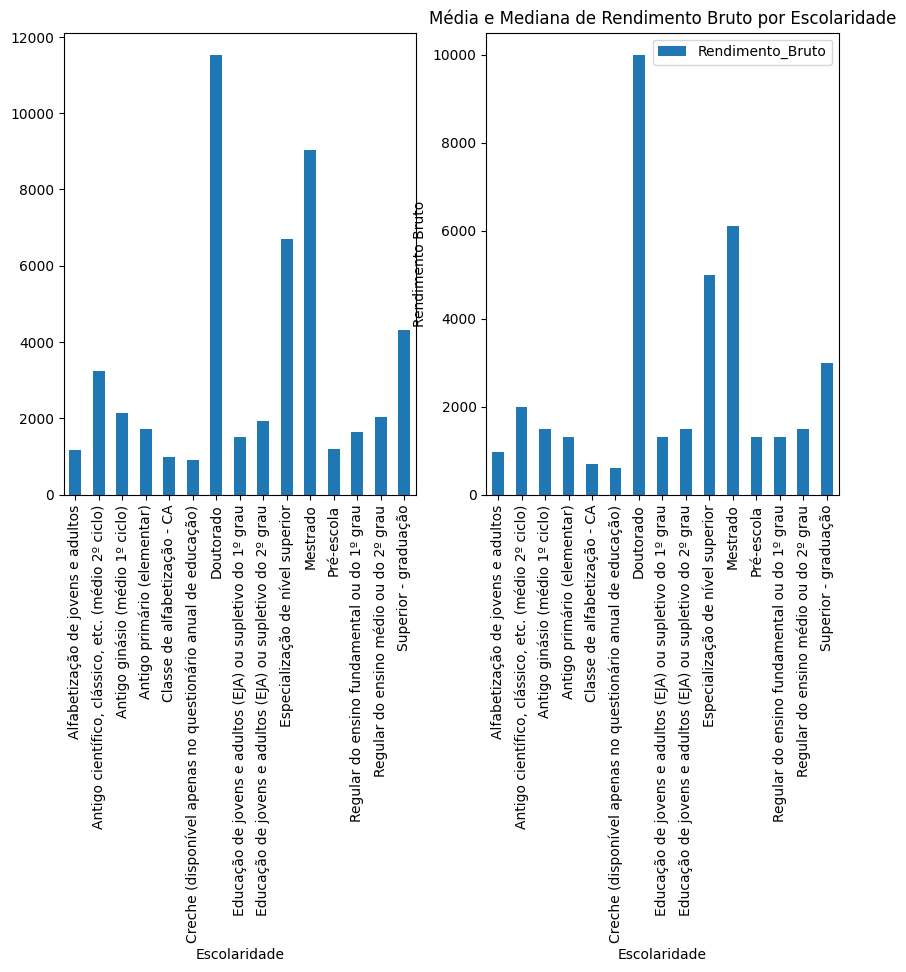

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(121)
media_salario.plot(kind = 'bar')
plt.subplot(122)
mediana_salario.plot(kind = 'bar');
plt.xlabel('Escolaridade')
plt.ylabel('Rendimento Bruto')
plt.title('Média e Mediana de Rendimento Bruto por Escolaridade')
plt.legend()
plt.show()

___
<div id="sexo-cor"></div>

## Análise por Sexo e Cor/Raça

[Índice](#indice)

In [ ]:
sexo_raca = dados[['Cor_ou_Raça', 'Sexo', 'Rendimento_Bruto']]

In [ ]:
sexo_raca

,Cor_ou_Raça,Sexo,Rendimento_Bruto
0,Parda,Homem,5000.0
1,Parda,Mulher,3500.0
2,Branca,Mulher,3700.0
3,Parda,Homem,3300.0
4,Branca,Homem,3500.0
...,...,...,...
175176,Branca,Mulher,5000.0
175177,Branca,Mulher,3500.0
175178,Branca,Homem,10000.0
175179,Branca,Homem,5000.0


___
<div id="idade"></div>

## Análise por Idade

[Índice](#indice)

- Temos que a idade miníma é de 14 anos, e a idade máxima é de 13 anos.
- Assim, dividindo em faixas etárias a nossa amostra temos:

**<p style = 'color: pink'> Faixas Etárias </p>**

    - Adolescente: Até 17 anos.
    - Adulto: Entre 18 anos à 59 anos.
    - Idoso: De e 60 anos pra cima.

In [24]:
descricao = dados['Idade'].describe()

# Idade Minima: 14 anos.
# Idade máxima: 103 anos.

In [80]:
adolescente = dados.loc[dados['Idade'] < 18]
adulto = dados.loc[(dados['Idade'] >= 18) & (dados['Idade'] < 59)]
idoso = dados.loc[dados['Idade'] >= 60]

**<p style = 'color: pink'> Visualizando em histogramas as faixas etárias.**

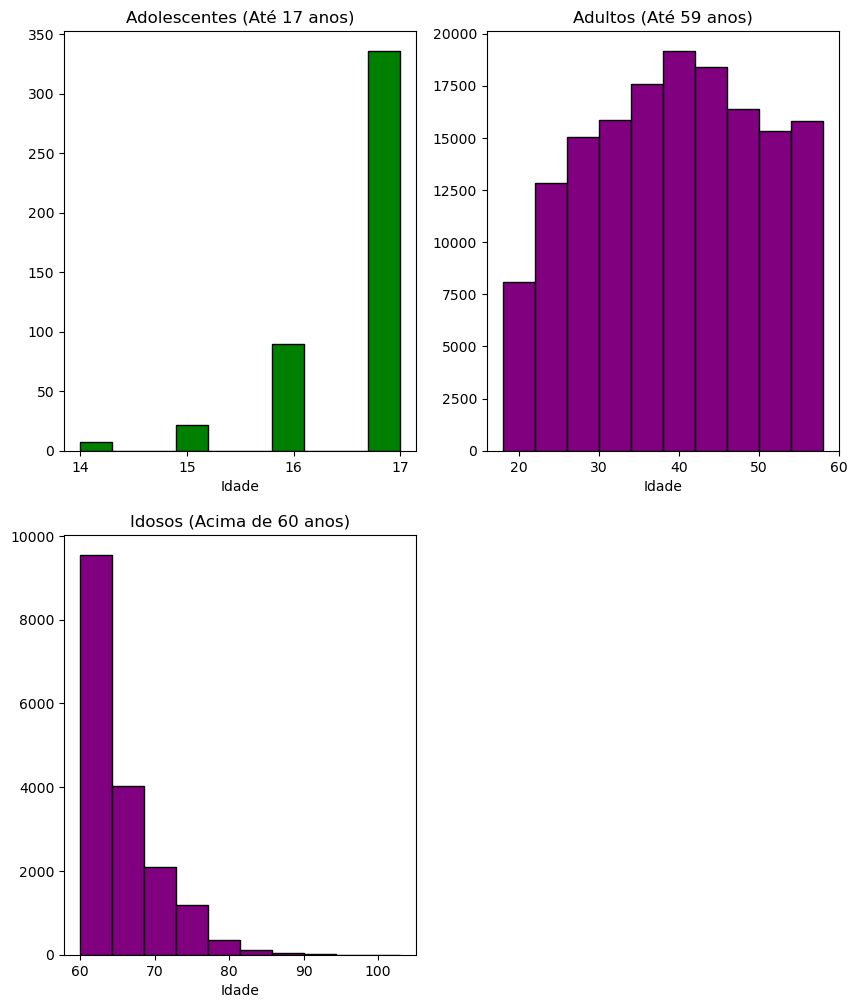

In [83]:
# Uma melhor visualização:
plt.figure( figsize = (10,12))

plt.subplot(2,2,1)
plt.title('Adolescentes (Até 17 anos)')
plt.hist(adolescente['Idade'], color = 'green', edgecolor = 'black')
plt.xlabel('Idade')
plt.xticks(range(14, 18, 1))


plt.subplot(2,2,2)
plt.title('Adultos (Até 59 anos)')
plt.hist(adulto['Idade'], color = 'purple', edgecolor = 'black')
plt.xlabel('Idade')

plt.subplot(2,2,3)
plt.title('Idosos (Acima de 60 anos)')
plt.hist(idoso['Idade'], color = 'purple', edgecolor = 'black')
plt.xlabel('Idade');


In [104]:
# Ver quantos cada ganha, de acordo com a idade:
# É preciso analisar por faixa!

ado_rend = adolescente[['Idade','Rendimento_Bruto']]
pd.crosstab(ado_rend['Rendimento_Bruto'], ado_rend['Idade'], normalize = True).round(3)

Idade,14,15,16,17
Rendimento_Bruto,,,,
30.0,0.0,0.000,0.000,0.002
40.0,0.0,0.000,0.000,0.002
50.0,0.0,0.000,0.007,0.002
60.0,0.0,0.000,0.000,0.002
70.0,0.0,0.000,0.002,0.002
...,...,...,...,...
2720.0,0.0,0.000,0.000,0.002
3000.0,0.0,0.000,0.000,0.007
3600.0,0.0,0.000,0.000,0.002


___
<div id="ocupa"></div>

#### Faixa de rendimento

- kdkbobd
- vkals

___
<div id="ocupa"></div>

## Distribuição por Ocupação

[Índice](#indice)